# **TELCO CHURN PREDICTION**
<img src="./images/churn.png" alt="Alternativer Text" width="1000" height="400">


## **INTRODUCTION**
### **Objectives**

Project objectives for Teleconfia's initiative to establish a foothold in the US, focusing on Florida, summarized in bullet points:

- Determine the four city areas in Florida with the highest customer churn rates to initiate the billboard marketing campaign.
- Identify individual customers likely to leave Teleconfia’s network for targeted direct marketing actions (calls, special offers).
- Analyze relevant datasets to identify high-risk areas and customers, examining factors indicating a high probability of churn.
- Predict customer churn based on identified variables and establish a critical probability threshold for defining likely churners, supported by compelling visualizations for presentation and decision-making.

### **Dataset**

The dataset received from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset "Churn in Telcom`s Dataset") offers a comprehensive view of customer behavior and service usage at Teleconfia, a telecommunications provider trying to establish a foothold in the US, specifically in Florida. It refers to the rate at which customers stop doing business with an entity. It contains several specific attributes relevant to customer accounts and geographic details.


| Feature                    | Data Type   | Description |
|----------------------------|-------------|-------------|
| `account_length`           | Integer     | Number of days the customer has been with the telecom provider. |
| `international_plan`       | Categorical | Whether the customer has a special pricing plan for international calls (`yes` or `no`). |
| `voice_mail_plan`          | Categorical | Whether the customer has a special pricing plan for voice mail services (`yes` or `no`). |
| `number_vmail_messages`    | Integer     | Number of voice mail messages the customer has. |
| `total_day_minutes`        | Float       | Total duration (in minutes) of the customer's calls during the day. |
| `total_day_calls`          | Integer     | Total number of calls the customer made during the day. |
| `total_day_charge`         | Float       | Total charges for the customer's calls during the day. |
| `total_eve_minutes`        | Float       | Total duration (in minutes) of the customer's calls during the evening. |
| `total_eve_calls`          | Integer     | Total number of calls the customer made during the evening. |
| `total_eve_charge`         | Float       | Total charges for the customer's calls during the evening. |
| `total_night_minutes`      | Float       | Total duration (in minutes) of the customer's calls during the night. |
| `total_night_calls`        | Integer     | Total number of calls the customer made during the night. |
| `total_night_charge`       | Float       | Total charges for the customer's calls during the night. |
| `total_intl_minutes`       | Float       | Total duration (in minutes) of the customer's international calls. |
| `total_intl_calls`         | Integer     | Total number of international calls the customer made. |
| `total_intl_charge`        | Float       | Total charges for the customer's international calls. |
| `customer_service_calls`   | Integer     | Number of calls the customer made to customer service, e.g., for technical issues. |
| `churn`                    | Categorical | Whether the customer has left the service (`True` or `False`). |
| `local_area_code`          | Categorical | The local area code of the customer. |
| `phone_num`                | Categorical | The customer's phone number without the area code. |



## **PREPROCESSING**
### **Load Data**

In [728]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlalchemy as sa
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as smf
%matplotlib inline
import sqlalchemy as sa
from sqlalchemy import create_engine, inspect
from IPython.display import display
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import statsmodels.api as sm




In [729]:
df = pd.read_csv("./data/churn_data.csv")

print(df.info())
display(df.head())
print('\n', 'Five-number summary:')
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



 Five-number summary:


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## **Data Cleansing and Transformation**

In [730]:
# Replace spaces in column names with underscores
df.columns = [col.replace(' ', '_') for col in df.columns]

# Show modified columns
print(df.columns)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


In [731]:
#Checking for duplicate values
df.duplicated().sum()

0

In [732]:
# Dictionary with column names as keys and desired data types as values
desired_dtypes = {
    'account_length': np.int64,
    'area_code': 'category',
    'phone_number': str,
    'international_plan': 'category',
    'voice_mail_plan': 'category',
    'number_vmail_messages': np.int64,
    'total_day_minutes': np.float64,
    'total_day_calls': np.int64,
    'total_day_charge': np.float64,
    'total_eve_minutes': np.float64,
    'total_eve_calls': np.int64,
    'total_eve_charge': np.float64,
    'total_night_minutes': np.float64,
    'total_night_calls': np.int64,
    'total_night_charge': np.float64,
    'total_intl_minutes': np.float64,
    'total_intl_calls': np.int64,
    'total_intl_charge': np.float64,
    'customer_service_calls': np.int64,
    'churn': 'bool'
}

# Iterate through the dictionary and adjust the data types of the columns accordingly
for column, dtype in desired_dtypes.items():
    df[column] = df[column].astype(dtype)

# Check the new data types
print(df.dtypes)


state                       object
account_length               int64
area_code                 category
phone_number                object
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                         bool
dtype: object


In [733]:
# Check for unique values in category columns
cat_cols = ["international_plan", "voice_mail_plan"]

for col in cat_cols:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}" )
    

international_plan: ['no', 'yes']
Categories (2, object): ['no', 'yes']
voice_mail_plan: ['yes', 'no']
Categories (2, object): ['no', 'yes']


In [734]:
df = df.replace(['yes', 'no'], ['1', '0'])
df[['international_plan', 'voice_mail plan']] = df[['international_plan', 'voice_mail_plan']].astype(int).astype(bool)

In [735]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,voice_mail plan
0,KS,128,415,382-4657,False,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,True
1,OH,107,415,371-7191,False,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,True
2,NJ,137,415,358-1921,False,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,False
3,OH,84,408,375-9999,True,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,False
4,OK,75,415,330-6626,True,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,False


In a next step visually explore the distribution of our data, focusing on central tendency, spread and outliers.

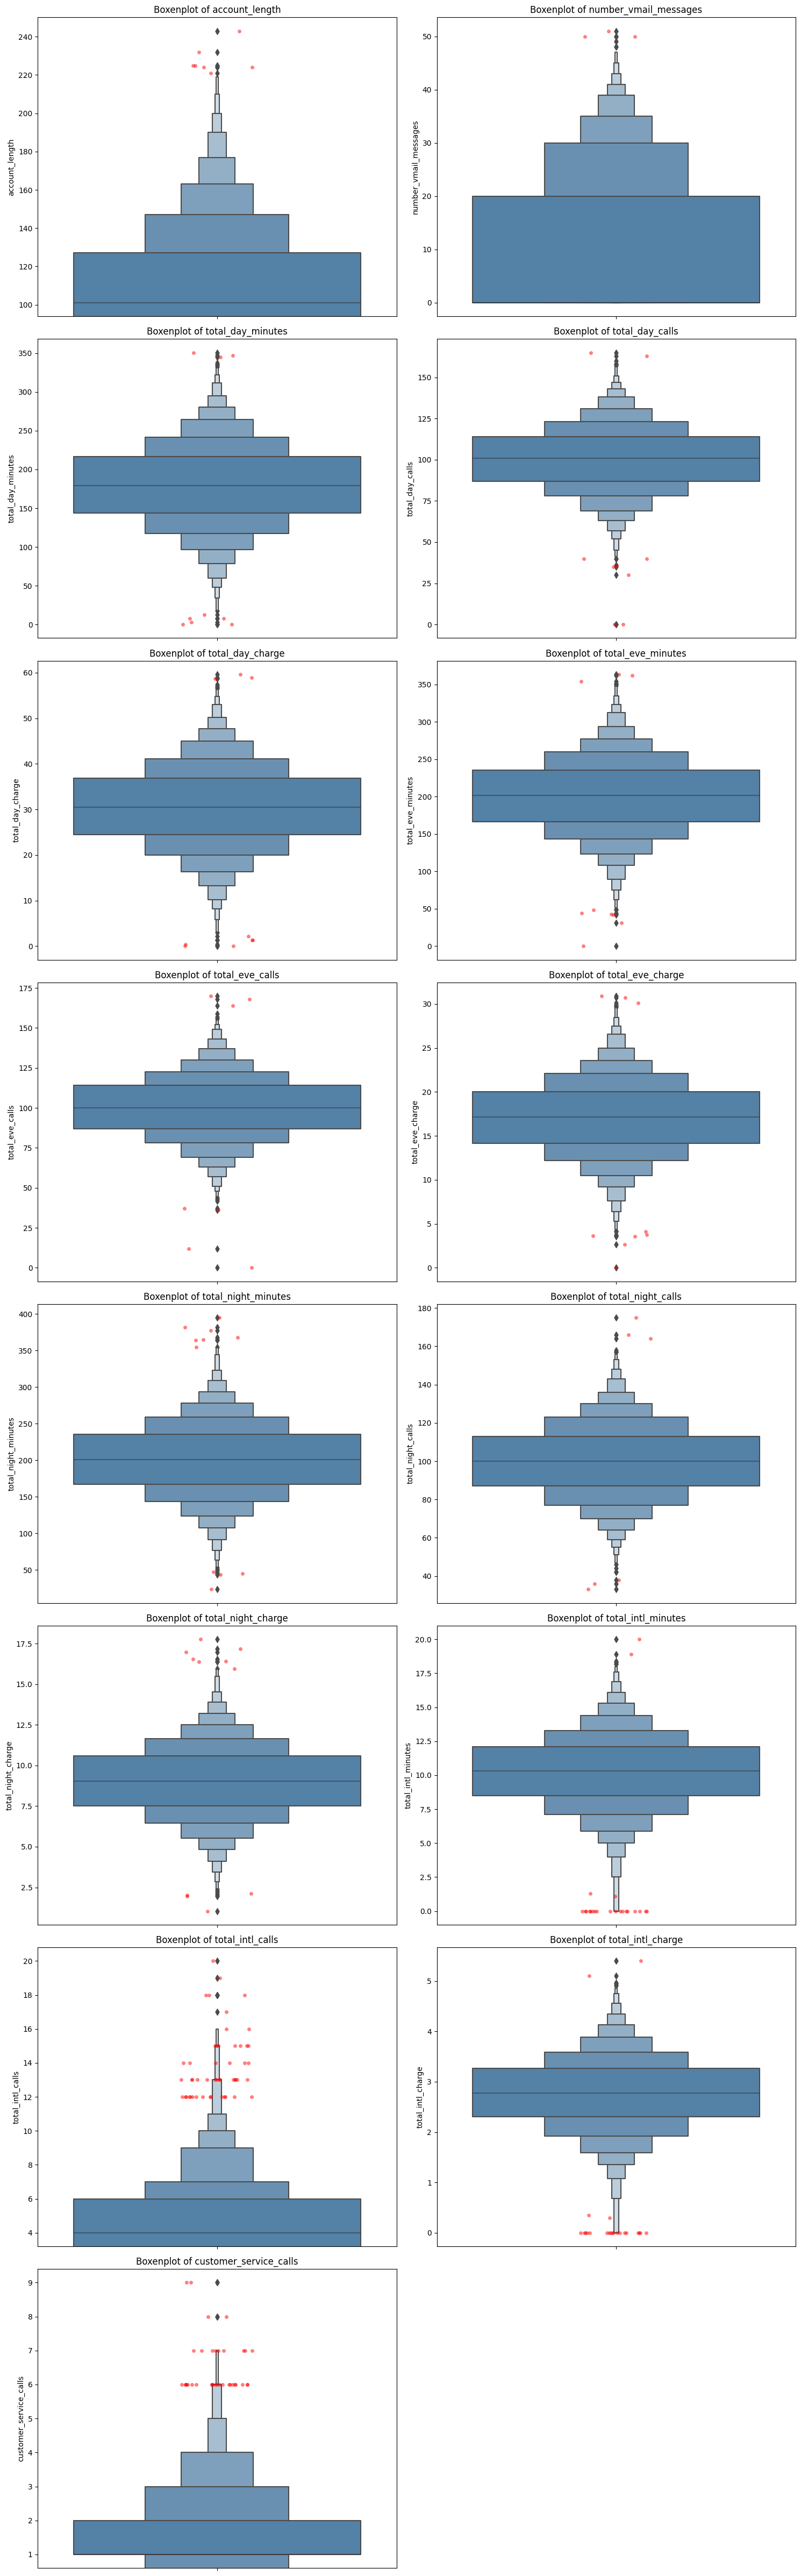

In [736]:
# Create a list of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Ensure we include int64 for completeness

# Change the number of subplots per row
num_subplots_per_row = 2

# Calculate the number of required rows and columns
num_cols = len(numeric_columns)
num_rows = (num_cols + num_subplots_per_row - 1) // num_subplots_per_row

# Create side-by-side boxenplots
plt.figure(figsize=(15, 6 * num_rows))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_subplots_per_row, i + 1)
    sns.boxenplot(data=df, y=column, color='steelblue')
    # Mark outliers (e.g., values that are more than 3 standard deviations from the mean)
    outlier_mask = (df[column] > df[column].mean() + 3 * df[column].std()) | \
                   (df[column] < df[column].mean() - 3 * df[column].std())
    sns.stripplot(data=df[outlier_mask], y=column, color='red', alpha=0.5, size=5)
    plt.ylabel(column)
    plt.title(f'Boxenplot of {column}')

plt.tight_layout()
plt.show()


### **INSIGHTS: Distribution of Numericals**

The image presents boxenplots for the given numerical metrics. Each boxenplot displays the interquartile range (IQR), which indicates where the central 50% of values fall, the median (the line within the box), and outliers (indicated by red plus symbols). Here's a summary interpretation of the plots:

- **Account Length:** Most customers have account lengths clustered around the median, with a fairly symmetric distribution and some outliers on both the lower and higher ends.
- **Number of Voicemail Messages:** A large number of customers seem to have few or no voicemail messages, with a decreasing number of customers as the number of messages increases, and some outliers with very high values.
- **Total Day Minutes and Charges:** These show a wide distribution, suggesting varied usage among customers, with some extreme values that are much higher than the median.
- **Total Day Calls:** The number of calls is fairly uniformly distributed around the median, indicating consistent usage across customers.
- **Total Eve Minutes and Charges, Total Night Minutes and Charges:** Similar to the day minutes and charges, these indicate varied usage in the evening and night with several outliers.
- **Total Eve Calls, Total Night Calls:** The calls in the evening and night show a uniform distribution around the median, similar to day calls.
- **Total Intl Minutes and Calls:** The distribution is slightly skewed to the left with outliers on the higher end, suggesting most customers use fewer international minutes and make fewer international calls, but a few have significantly higher usage.
- **Customer Service Calls:** Most customers make only a few service calls, but there's a notable number of outliers with a higher number of calls, which might indicate issues or dissatisfaction.

In [737]:
def check_unplausible_high_durations(df):
    """
    Checks for unplausible high call durations across specified call time columns.
    
    This function iterates through minute-based columns to find and report any records
    where the call duration exceeds a threshold of plausibility, assumed to be 480 minutes
    (equivalent to 8 hours) in this context.

    Parameters:
    - df (DataFrame): The pandas DataFrame containing call data.

    Returns:
    - None: Prints the findings.
    """
    # Define a list of minute-based columns to check for high durations
    minutes_columns = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']
    
    # Iterate over each column to check for values that exceed the plausibility threshold
    for column in minutes_columns:
        # Find rows in the current column where the call duration is greater than 480 minutes
        invalid_rows = df[(df[column] > 480)]
        
        # If any unplausible values are found, print them
        if not invalid_rows.empty:
            print(f"Unplausible values in column '{column}':")
            print(invalid_rows)
            print('\n')
            # Return from the function after finding the first set of unplausible values
            return
    
    # If no implausible call durations were found, print a confirmation message
    print("No unusually high call durations")
    
# Call the function to check for unplausible call durations in the dataframe 'df'
check_unplausible_high_durations(df)


No unusually high call durations


## **DATA ANALYSIS**

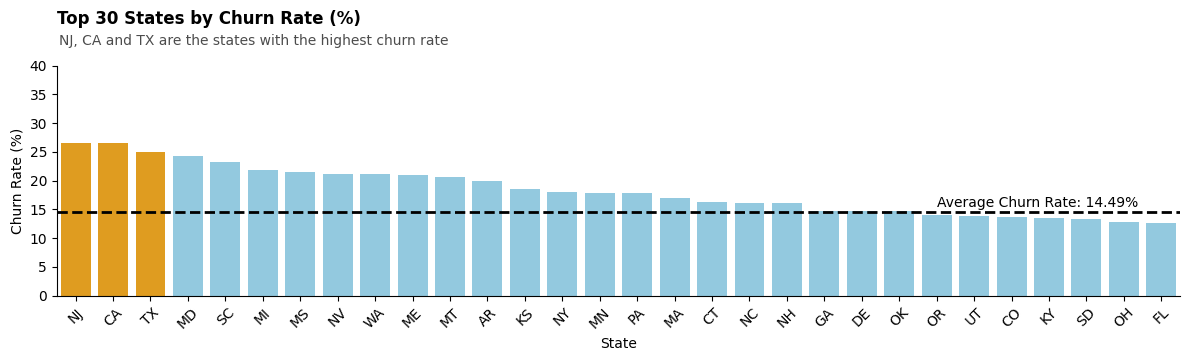

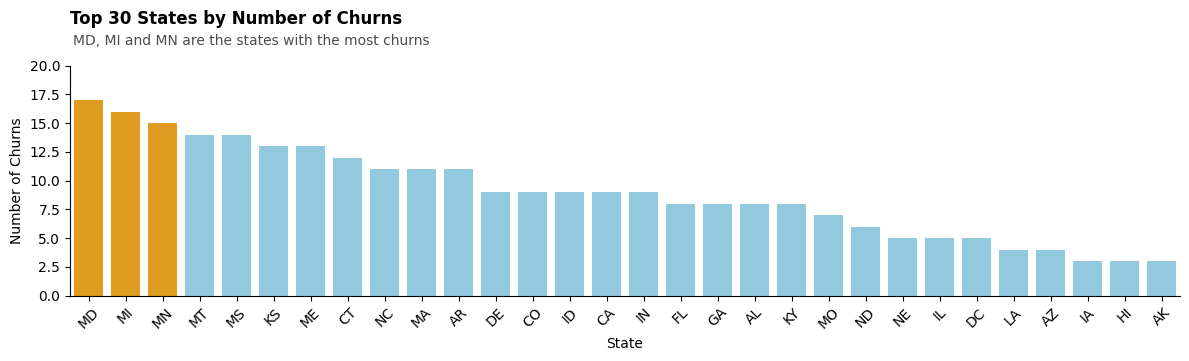

In [738]:
# Convert 'churn' column to numeric
df['churn'] = df['churn'].astype(int)

# Calculate overall churn ratio in the dataset
overall_churn_ratio = (df['churn'].sum() / len(df)) * 100

# Calculate churn ratio based on the state
state_churn_counts = df.groupby('state')['churn'].sum()
state_total_counts = df['state'].value_counts()
state_churn_ratio = (state_churn_counts / state_total_counts) * 100
state_churn_ratio = state_churn_ratio.sort_values(ascending=False)

# Limit the data to the top 20 states by churn rate
top_30_churn_ratio = state_churn_ratio.head(30)

# Define a custom color list
colors = ['orange' if i < 3 else 'skyblue' for i in range(30)]

plt.figure(figsize=(12, 4))
# Sort the top 20 states by churn rate for consistent coloring
top_30_churn_ratio_sorted = top_30_churn_ratio.sort_values(ascending=False)
sns.barplot(y=top_30_churn_ratio_sorted, x=top_30_churn_ratio_sorted.index, palette=colors)
plt.xticks(rotation=45)
plt.ylabel('Churn Rate (%)')
plt.xlabel('State')
plt.ylim(0,40)
plt.title('Top 30 States by Churn Rate (%)', pad=30, fontweight='bold', loc="left")

# Randlinien (Spines) nur oben und rechts entfernen
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mark the average churn rate
plt.axhline(overall_churn_ratio, color='black', linestyle='dashed', linewidth=2)
plt.text(23, overall_churn_ratio + 1, f'Average Churn Rate: {overall_churn_ratio:.2f}%', fontweight='normal')
plt.suptitle('NJ, CA and TX are the states with the highest churn rate', fontsize=10, alpha=0.7, x=0.216, y=0.83)


plt.tight_layout()
plt.show()

# Limit the data to the top 20 states by churn rate
top_30_churn_counts = state_churn_counts.head(30)

# Define a custom color list
colors = ['orange' if i < 3 else 'skyblue' for i in range(30)]

plt.figure(figsize=(12, 4))
# Sort the top 20 states by churn rate for consistent coloring
top_30_churn_counts_sorted = top_30_churn_counts.sort_values(ascending=False)
sns.barplot(y=top_30_churn_counts_sorted, x=top_30_churn_counts_sorted.index, palette=colors)
plt.xticks(rotation=45)
plt.ylabel('Number of Churns')
plt.xlabel('State')
plt.ylim(0,20)
plt.title('Top 30 States by Number of Churns', pad=30, fontweight='bold', loc="left")

# Randlinien (Spines) nur oben und rechts entfernen
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.suptitle('MD, MI and MN are the states with the most churns', fontsize=10, alpha=0.7, x=0.214, y=0.83)


plt.tight_layout()
plt.show()


### **INSIGHTS: Churn by States**

- **New Jersey (NJ), California (CA), and Texas (TX)** stand out with the highest churn rates, substantially above the average churn rate line.
- The **average churn rate** across all the states shown is 14.49%, which is marked by a dashed line for comparison.
- **Maryland (MD), Michigan (MI), and Minnesota (MN)** are highlighted as the states with the most churns, significantly leading the count compared to other states.
- **States towards the end of the chart**, like Arkansas (AR), Alaska (AK), and others, show the lowest numbers of churns among the top 30.

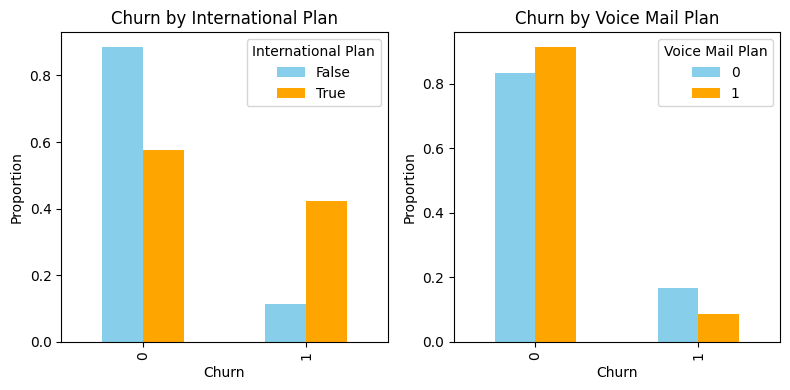

Relative churn rate for 'voice_mail_plan':
churn                    0          1
voice_mail_plan                      
0                83.284944  16.715056
1                91.323210   8.676790

Relative churn rate for 'international_plan':
churn                       0          1
international_plan                      
False               88.504983  11.495017
True                57.585139  42.414861



In [739]:
# Create crosstabs
cross_int_plan = pd.crosstab(index=df['churn'], 
                             columns=df['international_plan'], 
                             normalize='columns')

cross_vmail_plan = pd.crosstab(index=df['churn'], 
                               columns=df['voice_mail_plan'], 
                               normalize='columns')

# Create subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Assign first plot
cross_int_plan.plot(kind='bar', ax=ax[0], color=['skyblue', 'orange'])
ax[0].set_title('Churn by International Plan')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Proportion')
ax[0].legend(title='International Plan')

# Assign second plot
cross_vmail_plan.plot(kind='bar', ax=ax[1], color=['skyblue', 'orange'])
ax[1].set_title('Churn by Voice Mail Plan')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Proportion')
ax[1].legend(title='Voice Mail Plan')

plt.tight_layout()
plt.show()

# Calculating the relative churn rate for 'voice_mail_plan' using crosstab
voice_mail_plan_churn_crosstab = pd.crosstab(df['voice_mail_plan'], df['churn'], normalize='index') * 100
print("Relative churn rate for 'voice_mail_plan':")
print(voice_mail_plan_churn_crosstab)
print()

# Calculating the relative churn rate for 'international_plan' using crosstab
international_plan_churn_crosstab = pd.crosstab(df['international_plan'], df['churn'], normalize='index') * 100
print("Relative churn rate for 'international_plan':")
print(international_plan_churn_crosstab)
print()


### **INSIGHTS: International & Voice Mail Plan**

The provided bar charts illustrate the proportion of customers who have churned (indicated by '1') and those who have not (indicated by '0') with respect to two different plan features: International Plan and Voice Mail Plan.

- **International Plan:** The presence of an International Plan might indicate a risk factor for churn, which may require further investigation to understand why customers with this plan are more likely to leave.

- **Voice Mail Plan:** Conversely, the Voice Mail Plan seems to be a factor of retention, with customers enrolled in it being less likely to churn.



In [740]:
# Create a boolean mask for 'international_plan' = 'yes' and 'churn' = 0 (not churned yet)
mask = (df['international_plan'] == True) & (df['churn'] == 0)

# Select/filter data based on the mask
selected_customers_data = df[mask]

# Print the number of selected customers with an international plan who have not yet churned / Display first rows
print(f"Number of churning customers: {len(selected_customers_data)} \n")
print("Should be contacted:")
display(selected_customers_data.head())


Number of churning customers: 186 

Should be contacted:


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,voice_mail plan
3,OH,84,408,375-9999,True,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,False
4,OK,75,415,330-6626,True,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,False
5,AL,118,510,391-8027,True,0,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,0,False
7,MO,147,415,329-9001,True,0,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,0,False
9,WV,141,415,330-8173,True,1,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,0,True


In [741]:
# List of columns that appear to be integer-like
integer_like_columns = ['account_length', 'number_vmail_messages', 'total_day_calls',
                        'total_eve_calls', 'total_night_calls', 'customer_service_calls']

# Checking the number of unique values in the columns
for column in integer_like_columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_values}")


Number of unique values in column 'account_length': 212
Number of unique values in column 'number_vmail_messages': 46
Number of unique values in column 'total_day_calls': 119
Number of unique values in column 'total_eve_calls': 123
Number of unique values in column 'total_night_calls': 120
Number of unique values in column 'customer_service_calls': 10


<Figure size 800x800 with 0 Axes>

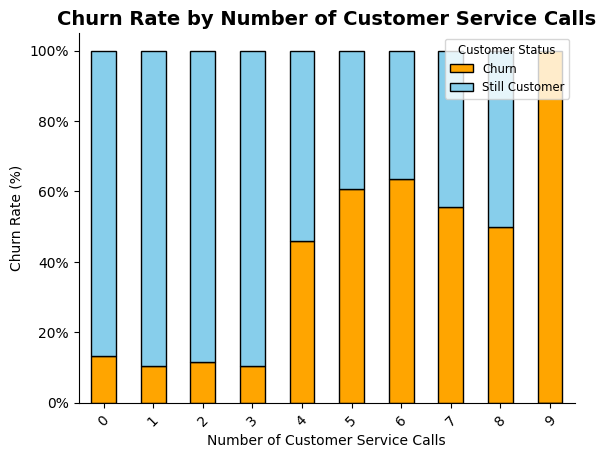

In [742]:
# Convert the 'customer_service_calls' column to the integer data type
df['customer_service_calls'] = df['customer_service_calls'].astype(int)

# Replace values in the 'churn' column
df.loc[:, 'churn'] = df['churn'].replace({0: 'Still Customer', 1: 'Churn'})

# Calculate churn rate based on 'customer_service_calls'
customer_service_calls_churn_counts = df.groupby('customer_service_calls')['churn'].value_counts(normalize=True).unstack() * 100

# Reorder the columns to have 'Still Customer' below 'Churn'
customer_service_calls_churn_counts = customer_service_calls_churn_counts[['Still Customer', 'Churn']]

# Add missing columns for 'Still Customer' and 'Churn' and set them to 0 if they don't exist
for column in ['Still Customer', 'Churn']:
    if column not in customer_service_calls_churn_counts.columns:
        customer_service_calls_churn_counts[column] = 0

# Sort the DataFrame columns alphabetically for consistency
customer_service_calls_churn_counts = customer_service_calls_churn_counts[['Churn', 'Still Customer']]

# Plotting the churn rate for each value of 'customer_service_calls'
plt.figure(figsize=(8, 8))
ax = customer_service_calls_churn_counts.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], edgecolor='black')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Number of Customer Service Calls')
plt.title('Churn Rate by Number of Customer Service Calls', fontweight='bold', fontsize=14)

# Formatting the y-axis labels to display percentages
ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks()])

# Removing the spines on the right and top to improve aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Updating the legend to reflect the correct labels
ax.legend(['Churn', 'Still Customer'], title='Customer Status', title_fontsize='small', fontsize='small')

# Display the plot
plt.show()


### **INSIGHTS: Churn by Service Calls**


- The bar chart depicts the churn rate relative to the number of customer service calls. It seems to indicate that as the number of customer service calls increases, so does the churn rate. Specifically, customers who made more than three service calls have a markedly higher churn rate, which suggests that after a certain point, the likelihood of customers leaving the service increases significantly with the number of service calls. This could imply that unresolved issues or dissatisfaction with customer service might be driving customers away. 
- Therefore, it would be beneficial for the company to investigate the reasons behind these calls and improve their customer service to retain customers, especially focusing on those who make more than three service calls.

In [743]:
# Creating a boolean mask for customers with at least 4 customer service calls
mask = (df['customer_service_calls'] >= 4) & (df['churn'] == 'Still Customer')

# Extracting customers who meet the criteria
selected_customers = df[mask]

# Calculating the number of customers
num_selected_customers = len(selected_customers)

# Displaying the number of customers
print("Number of customers with at least 4 customer service calls and not churned:", num_selected_customers)

# Displaying the selected customers
display(selected_customers.head())


Number of customers with at least 4 customer service calls and not churned: 129


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,voice_mail plan
14,IA,62,415,366-9238,False,0,0,120.7,70,20.52,...,26.11,203.0,99,9.14,13.1,6,3.54,4,Still Customer,False
97,AZ,99,415,327-3954,False,0,0,198.2,87,33.69,...,17.62,190.9,113,8.59,8.7,3,2.35,4,Still Customer,False
100,IA,98,510,379-6506,False,1,21,161.2,114,27.40,...,21.44,160.2,92,7.21,4.4,8,1.19,4,Still Customer,True
105,AZ,95,408,334-2577,False,0,0,238.1,65,40.48,...,15.91,190.0,115,8.55,11.8,4,3.19,4,Still Customer,False
112,AL,98,408,383-1509,False,0,0,161.0,117,27.37,...,16.23,227.7,113,10.25,12.1,4,3.27,4,Still Customer,False


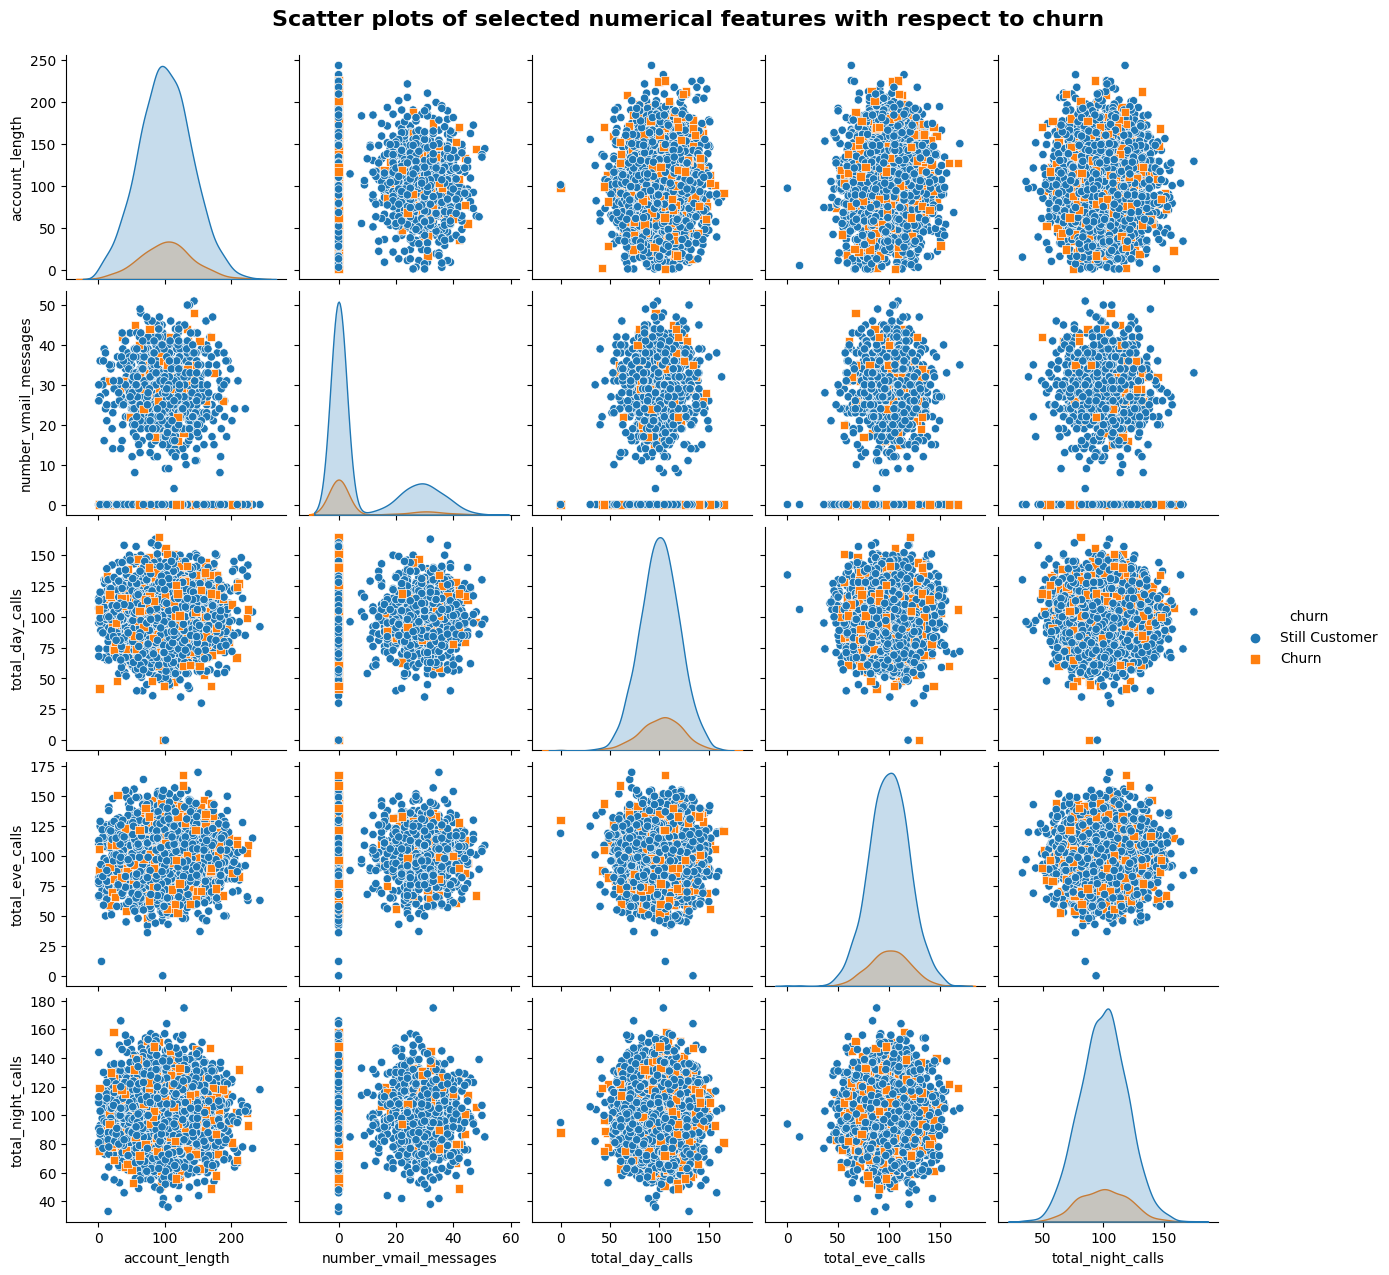

In [744]:
# List of numerical columns for analysis
integer_columns = [
    'account_length',
    'number_vmail_messages',
    'total_day_calls',
    'total_eve_calls',
    'total_night_calls'
]

# Create scatter plots for selected numerical features with respect to churn status
# 'o' and 's' markers are used to differentiate between the churn categories
# 'kde' is used for the diagonal to show the kernel density estimation for each feature
sns.pairplot(df, vars=integer_columns, hue='churn', markers=['o', 's'], diag_kind='kde')

# Set the title of the overall figure
plt.suptitle('Scatter plots of selected numerical features with respect to churn', y=1.02, fontsize=16, fontweight="bold")

# Display the resulting plots
plt.show()


### **INSIGHTS: Scatter Plot Numericals**

The scatter plot matrix provides a visual comparison of several numerical features against churn status. Each plot shows points for customers who remained with the service ("Still Customer") and those who churned ("Churn"). Here's an analysis of the patterns observed:

- In plots related to **account length**, there's no discernible pattern that distinguishes customers who churn from those who do not. The distribution and range of account lengths are similar for both groups.

- Looking at **number of voicemail messages**, most of the churned customers appear to have fewer voicemail messages, though the distinction is not particularly clear-cut.

- The scatter plots for **total day, evening, and night calls** don't show any distinct pattern separating churned from non-churned customers. The distribution of calls is quite similar for both categories.

- Kernel density estimates on the diagonal show the distribution of each feature. For most features, the distributions for churned and non-churned customers overlap significantly.

- There are no evident clusters or distinct separation between churned and non-churned customers based on the features presented.
- The kernel density plots suggest that the overall behavior, in terms of these features, is quite similar for customers regardless of churn status.


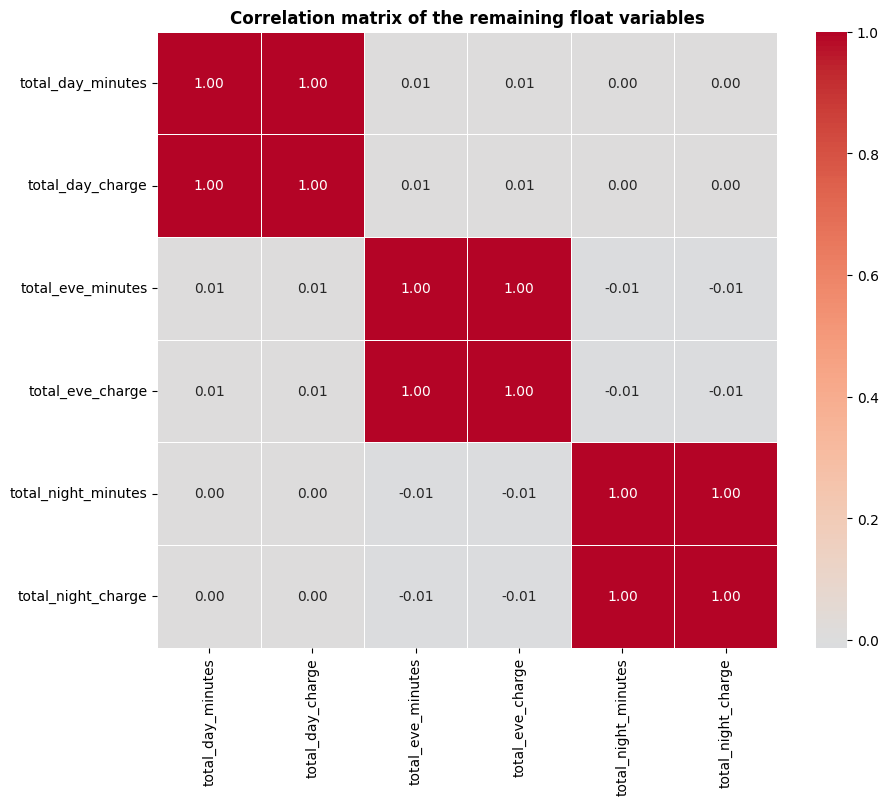

In [745]:
# Selecting the remaining float columns
float_columns = ['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge']

# Calculate the correlation matrix
correlation_matrix = df[float_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix of the remaining float variables', fontweight='bold', fontsize=12)
plt.show()

### The analysis of correlations reveals a complete correlation between the number of calls and the calculated
### costs for each time of day. Therefore, only the columns with minutes will be considered for further regression analysis.


### **INSIGHTS: Correlation Matrix**
- The perfect correlations between minutes and charges for the same time of day confirm that charges are based on the minutes used. These variables provide redundant information, so for modeling purposes, one might consider using only one of these pairs to avoid multicollinearity.

- The lack of significant correlation between different time periods suggests that usage patterns are independent of each other during the day, evening, and night. This independence implies that customer behavior in one part of the day does not necessarily predict their behavior in another.



In [746]:
# Create a list with columns to be deleted
charge_columns = ['total_day_charge', 'total_eve_charge', 'total_night_charge']

# Drop these columns
for col in charge_columns:
    df.drop(columns=col, inplace=True)

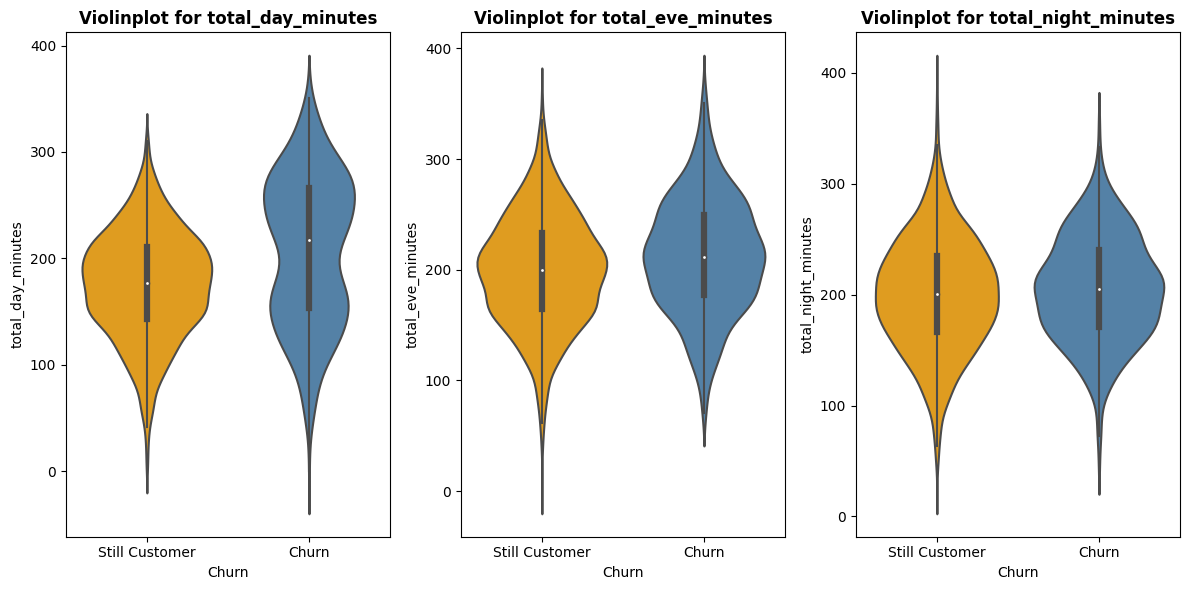

In [747]:
# Select the numerical columns for the violinplot
numerical_columns = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']

# Define custom color palette with blue and orange
custom_palette = ["#FFA500", "#4682B4"]

# Create violinplots for the numerical columns with the custom palette
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(x='churn', y=column, data=df, palette=custom_palette)
    plt.title(f'Violinplot for {column}', fontweight='bold')
    plt.xlabel('Churn')
    plt.ylabel(column)
plt.tight_layout()
plt.show()



### **INSIGHTS: Total Minutes per Day, Eve and Night**

The violin plots illustrate the distributions of total day, evening, and night minutes for customers who have remained with the service provider ("Still Customer") and those who have churned ("Churn"). Violin plots are useful for visualizing the distribution's density as they show kernel density estimation (KDE) on both sides of the box plot. Here are some interpretations and comparisons:

#### **Total Day Minutes**
- **Still Customer:** The distribution of day minutes for customers who have stayed appears symmetric and centered, with the highest density around the median, indicated by the white line in the box plot.
- **Churn:** Customers who have churned tend to use more day minutes on average. The distribution is also wider, suggesting a higher variability. The pronounced peak of the distribution at higher minute values could suggest that higher usage is a factor in churn.

#### **Total Eve Minutes**
- **Still Customer vs. Churn:** The distributions for evening minutes resemble those of day minutes, but the differences between the groups are less pronounced. Both staying and churning customers show a broad and similar distribution of evening minutes, indicating that this factor may have less influence on churn decisions.

#### **Total Night Minutes**
- **Still Customer vs. Churn:** Similar to evening minutes, there are no stark differences in the distribution of night minutes between customers who stayed and those who churned. Both groups display a broad and similar distribution with a high density around the median.

#### **Comparison Across Time Periods**
- **Day minutes** seem to be the most distinctive feature between customers who stay and those who churn, indicating potential influence.
- **Evening and night minutes** do not show as clear differences between the groups, suggesting these times may be less indicative regarding churn.

#### **General Observations**
- The comparison indicates that day minute usage could be a potentially stronger predictor for churn than evening and night minutes.
- The wider distribution among customers who churn could point to varied usage patterns that may be influenced by over-usage or dissatisfaction during peak usage times (day).


In [748]:
# Convert 'churn' to binary values
df['churn'] = df['churn'].map({'Still Customer': 0, 'Churn': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   object  
 1   account_length          3333 non-null   int64   
 2   area_code               3333 non-null   category
 3   phone_number            3333 non-null   object  
 4   international_plan      3333 non-null   bool    
 5   voice_mail_plan         3333 non-null   category
 6   number_vmail_messages   3333 non-null   int64   
 7   total_day_minutes       3333 non-null   float64 
 8   total_day_calls         3333 non-null   int64   
 9   total_eve_minutes       3333 non-null   float64 
 10  total_eve_calls         3333 non-null   int64   
 11  total_night_minutes     3333 non-null   float64 
 12  total_night_calls       3333 non-null   int64   
 13  total_intl_minutes      3333 non-null   float64 
 14  total_intl_calls        

Optimization terminated successfully.
         Current function value: 0.392178
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                 0.05222
Time:                        23:40:40   Log-Likelihood:                -1307.1
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 3.490e-33
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.9293      0.203    -19.373      0.000      -4.327      -3.532
total_da

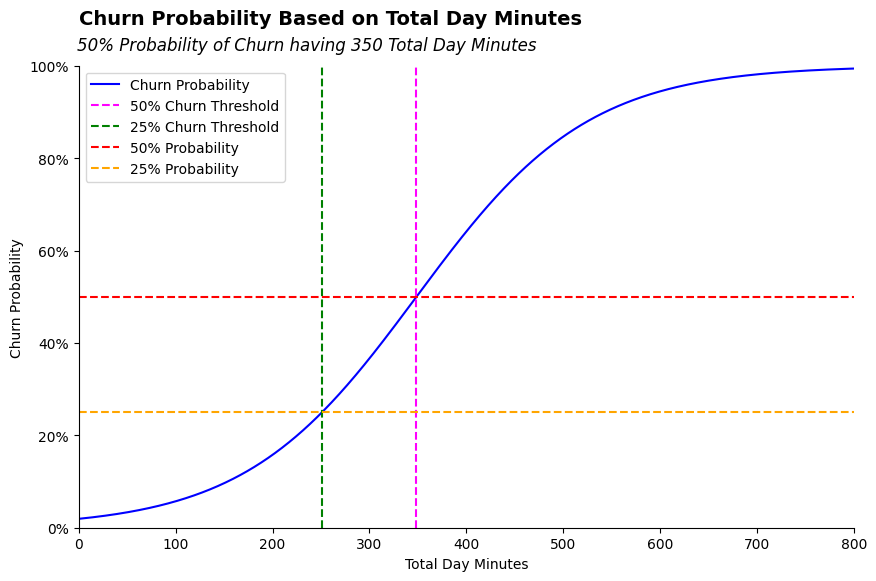

In [749]:

# Prepare the data for logistic regression
X = df['total_day_minutes']  # Independent variable
X = sm.add_constant(X)  # Adding a constant term for the intercept
y = df['churn']  # Dependent variable (binary: 1 for churn, 0 for not churn)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())

# Extract model parameters
intercept, coef = logit_model.params['const'], logit_model.params['total_day_minutes']

# Calculate the 25% churn threshold
threshold_25 = -(np.log(3) + intercept) / coef

# Calculate the 50% churn threshold
threshold = -intercept / coef

# Calculate probabilities for plotting
x_range = np.linspace(0, 800, 1000)  # Extend x-axis up to 800 minutes
y_predicted = logit_model.predict(sm.add_constant(x_range))  # Predicted probabilities

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_predicted, 'b-', label='Churn Probability')

# Marking the 50% churn threshold with a vertical line
plt.axvline(threshold, color='magenta', linestyle='--', label='50% Churn Threshold')

# Adding a 25% churn threshold with a vertical line
plt.axvline(threshold_25, color='green', linestyle='--', label='25% Churn Threshold')

# Horizontal lines for 50% and 25% probabilities
plt.axhline(0.5, color='red', linestyle='--', label='50% Probability')
plt.axhline(0.25, color='orange', linestyle='--', label='25% Probability')

plt.xlim([0, 800])  # Setting the limits for the x-axis
plt.ylim([0, 1])  # Setting the limits for the y-axis (0 to 100%)

# Aesthetic adjustments
plt.title('Churn Probability Based on Total Day Minutes', fontsize=14, fontweight='bold', loc="left", pad=30)
plt.suptitle('50% Probability of Churn having 350 Total Day Minutes', fontsize=12, style='italic', y=0.93, x=0.353)
plt.xlabel('Total Day Minutes')
plt.ylabel('Churn Probability')

# Format the y-axis to show percentages
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y)) 
plt.gca().yaxis.set_major_formatter(formatter)

# Removing the top and right frame lines to improve aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend()
plt.show()


The provided graph visualizes the churn probability as a function of total day minutes, while the logistic regression summary gives the statistical relationship between these variables.

- **Churn Probability Curve**: Indicates an increasing probability of churn with more total day minutes used. The 50% churn probability is reached at around 350 total day minutes.
- **Logistic Regression Summary**:
  - The model suggests a notable but not strong relationship (Pseudo R-squared: 0.05222) between day minutes and churn.
  - The negative constant (-3.9293) implies that in the absence of day minutes usage, the probability of churn is low.
  - The positive coefficient for total day minutes (0.0113) implies that each additional minute increases the likelihood of churn slightly.
  - The low p-value for the `total_day_minutes` coefficient indicates a statistically significant impact on churn.

The total day minutes are a significant predictor of churn, with higher usage associated with a higher likelihood of churn. However, given the low Pseudo R-squared value, other factors not included in the model likely influence the churn as well.


Optimization terminated successfully.
         Current function value: 0.409455
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                 0.01047
Time:                        23:40:40   Log-Likelihood:                -1364.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 7.750e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.8563      0.213    -13.402      0.000      -3.274      -2.439
total_ev

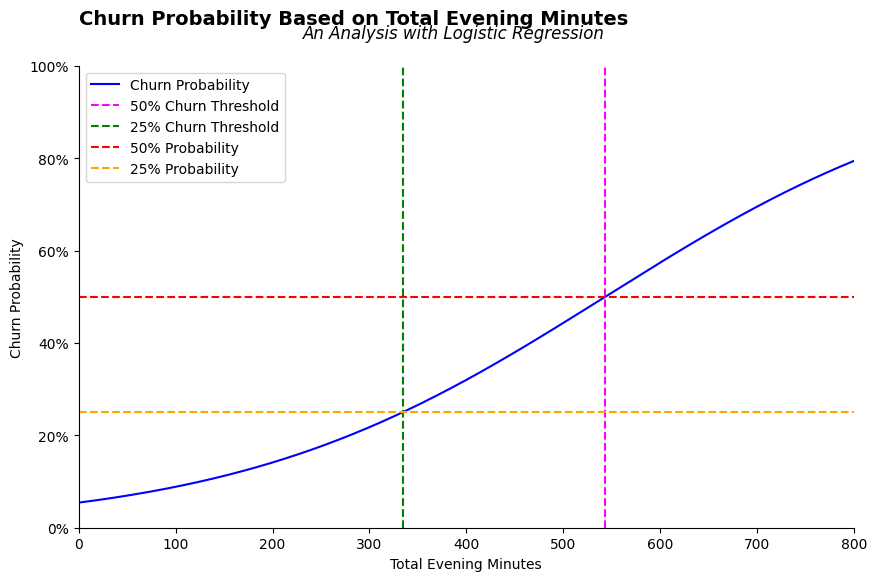

In [750]:
# Prepare the data for logistic regression
X_eve = df['total_eve_minutes']  # Independent variable for evening minutes
X_eve = sm.add_constant(X_eve)  # Adding a constant term for the intercept
y = df['churn']  # Dependent variable (binary: 1 for churn, 0 for not churn)

# Fit the logistic regression model for evening minutes
logit_model_eve = sm.Logit(y, X_eve).fit()

# Print the model summary for evening minutes
print(logit_model_eve.summary())

# Extract model parameters for evening minutes
intercept_eve, coef_eve = logit_model_eve.params['const'], logit_model_eve.params['total_eve_minutes']

# Calculate the 25% churn threshold for evening minutes
threshold_25_eve = -(np.log(3) + intercept_eve) / coef_eve

# Calculate the 50% churn threshold for evening minutes
threshold_eve = -intercept_eve / coef_eve

# Calculate probabilities for plotting evening minutes
x_range_eve = np.linspace(0, 800, 1000)  # Extend x-axis up to 800 minutes
y_predicted_eve = logit_model_eve.predict(sm.add_constant(x_range_eve))  # Predicted probabilities for evening minutes

# Create the plot for evening minutes
plt.figure(figsize=(10, 6))
plt.plot(x_range_eve, y_predicted_eve, 'b-', label='Churn Probability')

# Marking the 50% churn threshold with a vertical line for evening minutes
plt.axvline(threshold_eve, color='magenta', linestyle='--', label='50% Churn Threshold')

# Adding a 25% churn threshold with a vertical line for evening minutes
plt.axvline(threshold_25_eve, color='green', linestyle='--', label='25% Churn Threshold')

# Horizontal lines for 50% and 25% probabilities
plt.axhline(0.5, color='red', linestyle='--', label='50% Probability')
plt.axhline(0.25, color='orange', linestyle='--', label='25% Probability')

plt.xlim([0, 800])  # Setting the limits for the x-axis
plt.ylim([0, 1])  # Setting the limits for the y-axis (0 to 100%)

# Aesthetic adjustments for evening minutes plot
plt.title('Churn Probability Based on Total Evening Minutes', fontsize=14, fontweight='bold', loc="left", pad=30)
plt.suptitle('An Analysis with Logistic Regression', fontsize=12, style='italic', y=0.95)
plt.xlabel('Total Evening Minutes')
plt.ylabel('Churn Probability')

# Format the y-axis to show percentages
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y)) 
plt.gca().yaxis.set_major_formatter(formatter)

# Removing the top and right frame lines to improve aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend()
plt.show()


#### **INSIGHTS: Evening Minutes**

- The influence of evening minutes on churn is lower than day minutes.
- Churn probability still increases with more evening minutes, albeit less steeply.
- Total day minutes have a more substantial impact on churn probability than total evening minutes.
- Both day and evening usage are significant predictors of churn, but day usage is a stronger predictor.


Optimization terminated successfully.
         Current function value: 0.413155
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                0.001523
Time:                        23:40:40   Log-Likelihood:                -1377.0
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                   0.04041
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1796      0.205    -10.617      0.000      -2.582      -1.777
to

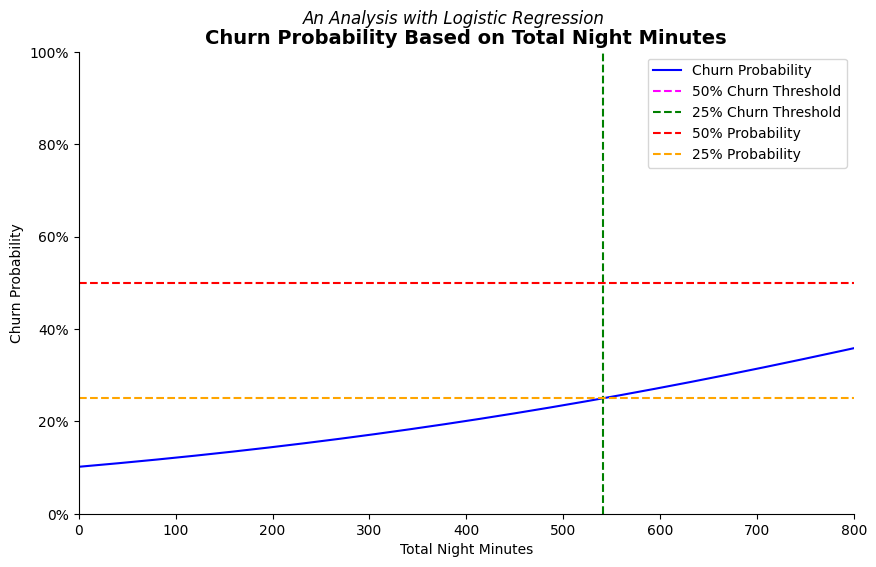

In [751]:
# Prepare the data for logistic regression
X_night = df['total_night_minutes']  # Independent variable for night minutes
X_night = sm.add_constant(X_night)  # Adding a constant term for the intercept
y = df['churn']  # Dependent variable (binary: 1 for churn, 0 for not churn)

# Fit the logistic regression model for night minutes
logit_model_night = sm.Logit(y, X_night).fit()

# Print the model summary for night minutes
print(logit_model_night.summary())

# Extract model parameters for night minutes
intercept_night, coef_night = logit_model_night.params['const'], logit_model_night.params['total_night_minutes']

# Calculate the 25% churn threshold for night minutes
threshold_25_night = -(np.log(3) + intercept_night) / coef_night

# Calculate the 50% churn threshold for night minutes
threshold_night = -intercept_night / coef_night

# Calculate probabilities for plotting night minutes
x_range_night = np.linspace(0, 800, 1000)  # Extend x-axis up to 800 minutes
y_predicted_night = logit_model_night.predict(sm.add_constant(x_range_night))  # Predicted probabilities for night minutes

# Create the plot for night minutes
plt.figure(figsize=(10, 6))
plt.plot(x_range_night, y_predicted_night, 'b-', label='Churn Probability')

# Marking the 50% churn threshold with a vertical line for night minutes
plt.axvline(threshold_night, color='magenta', linestyle='--', label='50% Churn Threshold')

# Adding a 25% churn threshold with a vertical line for night minutes
plt.axvline(threshold_25_night, color='green', linestyle='--', label='25% Churn Threshold')

# Horizontal lines for 50% and 25% probabilities
plt.axhline(0.5, color='red', linestyle='--', label='50% Probability')
plt.axhline(0.25, color='orange', linestyle='--', label='25% Probability')

plt.xlim([0, 800])  # Setting the limits for the x-axis
plt.ylim([0, 1])  # Setting the limits for the y-axis (0 to 100%)

# Aesthetic adjustments for night minutes plot
plt.title('Churn Probability Based on Total Night Minutes', fontsize=14, fontweight='bold')
plt.suptitle('An Analysis with Logistic Regression', fontsize=12, style='italic', y=0.95)
plt.xlabel('Total Night Minutes')
plt.ylabel('Churn Probability')

# Format the y-axis to show percentages
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y)) 
plt.gca().yaxis.set_major_formatter(formatter)

# Removing the top and right frame lines to improve aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend()
plt.show()


#### **INSIGHTS: Night Minutes**
- There's a very slight increase in churn probability with more night minutes used.
- The effect of night minutes on churn is the weakest among the three, with a Pseudo R-squared of 0.001523.

In all three models, as the number of minutes increases, so does the likelihood of churn. However, the impact is most substantial with day minutes and least with night minutes.

## **SUMMARY**

### **Insights:**

**International Plan and Voice Mail Plan:**
- Customers with an International Plan exhibit a higher churn rate, possibly indicating dissatisfaction with international service terms or costs.
- Conversely, the Voice Mail Plan seems to enhance customer retention as subscribers to this plan demonstrate lower churn rates.

**Service Calls:**
- An increasing number of customer service calls correlates with higher churn rates, especially beyond the third call, indicating dissatisfaction due to unresolved issues from the first call.

**Usage Patterns:**
- Customers averaging more daytime minutes tend to churn more, which might reflect overuse or dissatisfaction with services during peak times.
- No clear differences in usage patterns are observed between staying and churning customers during evening and night times.

**State-Specific Data:**
- Certain states, like New Jersey and Texas, display disproportionately high churn rates, which could point to region-specific issues or market dynamics.

### **Recommendations:**

**For International Plan and Voice Mail Plan:**
- Review and adjust International Plan rates and offerings to improve customer satisfaction and reduce churn.
- Promote the Voice Mail Plan in marketing campaigns to highlight its benefits and strengthen customer loyalty.

**For Service Calls:**
- Enhance customer service with targeted training and introduce a follow-up system to ensure customer issues are resolved on the first call.
- Implement an escalation system to ensure customers requiring multiple calls receive special attention.

**For Usage Patterns:**
- Analyze usage data to develop targeted advertising campaigns that cater to high-usage customers, possibly offering better rates or services.
- Conduct satisfaction surveys among high daytime minutes users to identify and address potential sources of dissatisfaction.

**Region-Specific Strategies:**
- Investigate high churn rates in certain states to identify and address regional issues.
- Tailor marketing strategies and service offerings to the specific needs and challenges in states with high churn rates.
